## **Examen de cinturón AML – Opción C**

**Descripción del examen:**
En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. 

El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

**Dataset:**

El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

**Instrucciones:**

**1. Exploración y preprocesamiento de datos:**
* Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
* Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

**2. Análisis no supervisado:**

Selecciona un enfoque de análisis no supervisado: **K-means o PCA.**
* K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
* PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

**3. Modelado con MLP:**
* Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
* Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

**4. Evaluación del modelo:**
* Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
* Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

**5. Discusión y análisis:**
* Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
* Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

**6. Entrega final:**
  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.

**Inicio**

In [2]:
import pandas as pd

# Carga de datos
data_path = "../data/train.csv"
df_train = pd.read_csv(data_path)

In [3]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
print(df_train.tail())  # Últimas 5 filas

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
7347          0.043616          0.060410          0.210795  .

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
print(df_train.shape)

(7352, 563)


In [7]:
# Mostrar los nombres de todas las columnas
print(df_train.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [8]:
import pandas as pd

# Carga de datos
data_path = "../data/test.csv"
df_test = pd.read_csv(data_path)

In [9]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [10]:
print(df_test.tail())  # Últimas 5 filas

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2942         -0.148775         -0.232057          0.185361  .

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [12]:
print(df_test.shape)

(2947, 563)


In [13]:
# Mostrar los nombres de todas las columnas
print(df_test.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [14]:
# Comparar columnas directamente
if list(df_train.columns) == list(df_test.columns):
    print("Las columnas de df_train y df_test son iguales.")
else:
    print("Las columnas de df_train y df_test son diferentes.")


Las columnas de df_train y df_test son iguales.


In [15]:
# Ver la distribución de las clases en df_train y df_test
print(df_train['Activity'].value_counts())  # Distribución de clases en entrenamiento
print(df_test['Activity'].value_counts())  # Distribución de clases en prueba


Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64
Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


In [16]:
# Ver el resumen estadístico
print("Resumen estadístico de las columnas numéricas:")
print(df_train.describe())


Resumen estadístico de las columnas numéricas:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0

In [17]:

# Revisar tipos de datos
print("Tipos de datos en el dataset:")
print(df_train.dtypes)

Tipos de datos en el dataset:
tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


 **Identificar las variables sensoriales**

In [18]:
# Identificar columnas sensoriales
sensor_columns = [col for col in df_train.columns if "Body" in col or "Acc" in col or "Gyro" in col]

# Ver las primeras columnas sensoriales
print("Columnas sensoriales:")
print(sensor_columns[:10])  # Mostrar solo las primeras 10


Columnas sensoriales:
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [19]:
# Filtrar columnas con valores nulos
columnas_nulas = df_train.columns[df_train.isnull().any()]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
valores_nulos = df_train[columnas_nulas].isnull().sum()
print(valores_nulos)


Series([], dtype: float64)


In [20]:
print(columnas_nulas.tolist())

[]


In [21]:
# Mostrar las filas duplicadas
filas_duplicadas = df_train[df_train.duplicated()]
print(filas_duplicadas)

# Contar cuántas filas duplicadas existen
cantidad_duplicadas = df_train.duplicated().sum()
print(f"Cantidad de filas duplicadas: {cantidad_duplicadas}")


Empty DataFrame
Columns: [tBodyAcc-mean()-X, tBodyAcc-mean()-Y, tBodyAcc-mean()-Z, tBodyAcc-std()-X, tBodyAcc-std()-Y, tBodyAcc-std()-Z, tBodyAcc-mad()-X, tBodyAcc-mad()-Y, tBodyAcc-mad()-Z, tBodyAcc-max()-X, tBodyAcc-max()-Y, tBodyAcc-max()-Z, tBodyAcc-min()-X, tBodyAcc-min()-Y, tBodyAcc-min()-Z, tBodyAcc-sma(), tBodyAcc-energy()-X, tBodyAcc-energy()-Y, tBodyAcc-energy()-Z, tBodyAcc-iqr()-X, tBodyAcc-iqr()-Y, tBodyAcc-iqr()-Z, tBodyAcc-entropy()-X, tBodyAcc-entropy()-Y, tBodyAcc-entropy()-Z, tBodyAcc-arCoeff()-X,1, tBodyAcc-arCoeff()-X,2, tBodyAcc-arCoeff()-X,3, tBodyAcc-arCoeff()-X,4, tBodyAcc-arCoeff()-Y,1, tBodyAcc-arCoeff()-Y,2, tBodyAcc-arCoeff()-Y,3, tBodyAcc-arCoeff()-Y,4, tBodyAcc-arCoeff()-Z,1, tBodyAcc-arCoeff()-Z,2, tBodyAcc-arCoeff()-Z,3, tBodyAcc-arCoeff()-Z,4, tBodyAcc-correlation()-X,Y, tBodyAcc-correlation()-X,Z, tBodyAcc-correlation()-Y,Z, tGravityAcc-mean()-X, tGravityAcc-mean()-Y, tGravityAcc-mean()-Z, tGravityAcc-std()-X, tGravityAcc-std()-Y, tGravityAcc-std()-Z, t

relaciones

In [22]:
columnas = df_train.columns.tolist()
print(columnas)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

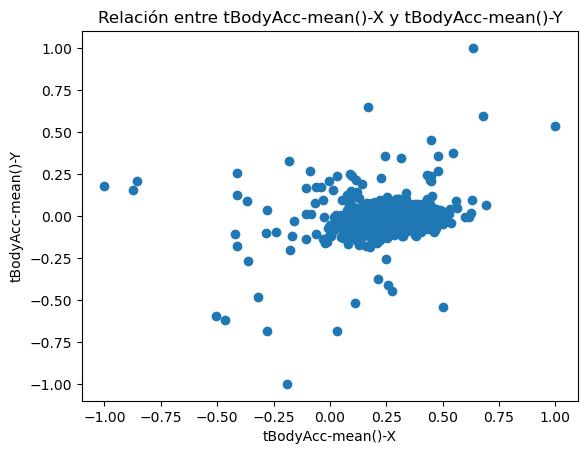

In [23]:
import matplotlib.pyplot as plt

# Ejemplo de un gráfico de dispersión entre tBodyAcc-mean()-X y tBodyAcc-mean()-Y
plt.scatter(df_train['tBodyAcc-mean()-X'], df_train['tBodyAcc-mean()-Y'])
plt.title('Relación entre tBodyAcc-mean()-X y tBodyAcc-mean()-Y')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('tBodyAcc-mean()-Y')
plt.show()


In [24]:
# Filtrar columnas con valores nulos
columnas_nulas = df_train.columns[df_train.isnull().any()]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
valores_nulos = df_train[columnas_nulas].isnull().sum()
print(valores_nulos)

Series([], dtype: float64)


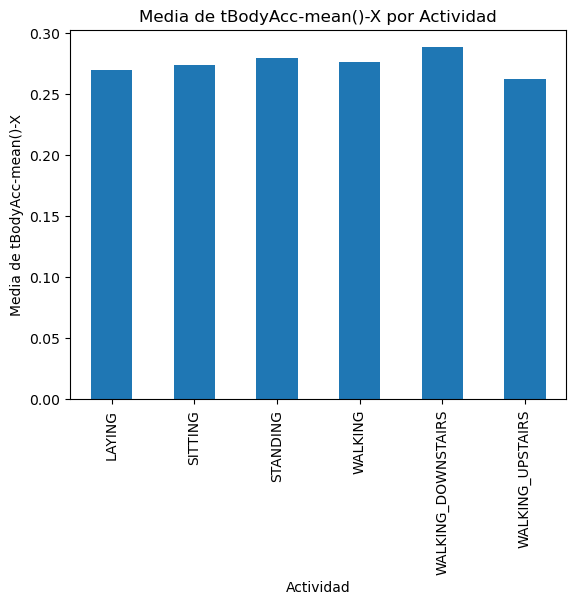

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por la columna 'activity' y calcular la media de tBodyAcc-mean()-X
activity_means = df_train.groupby('Activity')['tBodyAcc-mean()-X'].mean()

# Crear gráfico de barras
activity_means.plot(kind='bar')
plt.title('Media de tBodyAcc-mean()-X por Actividad')
plt.xlabel('Actividad')
plt.ylabel('Media de tBodyAcc-mean()-X')
plt.show()


In [26]:
# Acceder a las columnas relacionadas con aceleración
aceleracion_columns = [col for col in df_train.columns if 'tBodyAcc' in col]

# Acceder a las columnas relacionadas con la actividad
actividad_column = ['Activity']

# Mostrar los nombres de las columnas de aceleración
print(aceleracion_columns)

# Mostrar los nombres de las columnas de actividad
print(actividad_column)
X = df_train[aceleracion_columns]

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 

**normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.**

In [27]:
from sklearn.preprocessing import StandardScaler

# Separar características y etiquetas
X_train = df_train.drop(columns=["Activity"])
y_train = df_train["Activity"]

X_test = df_test.drop(columns=["Activity"])
y_test = df_test["Activity"]

# Normalizar los datos (media = 0, desviación estándar = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Análisis no supervisado:**

PCA: 
* Realizar una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. 
* Visualiza los datos en el espacio reducido de los componentes principales.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Crear el objeto PCA y ajustar los datos
pca = PCA(n_components=2)  # Usaremos 2 componentes principales para visualización
X_pca = pca.fit_transform(X_train_scaled)


C:\Users\user\AppData\Local\Temp\ipykernel_10916\1618797192.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],  palette='viridis')


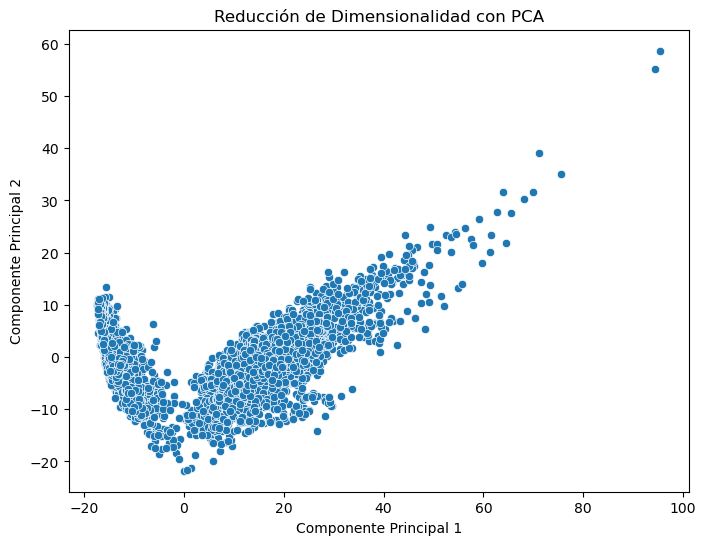

In [29]:
# Graficar los datos reducidos
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],  palette='viridis')

plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


 **Explicar la varianza explicada**

In [30]:
# Ver la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", np.sum(pca.explained_variance_ratio_))


Varianza explicada por cada componente: [0.5069245  0.06569275]
Varianza total explicada: 0.5726172463183785


Varianza explicada por cada componente: [5.06924500e-01 6.56927463e-02 2.80224134e-02 2.49949733e-02
 1.88496772e-02 1.72315388e-02 1.36869461e-02 1.20273017e-02
 9.96711954e-03 9.63413035e-03 8.58813927e-03 7.99562881e-03
 7.67143930e-03 6.47479547e-03 6.33271002e-03 5.98706928e-03
 5.86494641e-03 5.74384082e-03 5.67486618e-03 5.26419437e-03
 4.99898004e-03 4.87619376e-03 4.82364809e-03 4.68466269e-03
 4.50039132e-03 4.22376716e-03 4.17790747e-03 4.06438367e-03
 3.90758927e-03 3.86480058e-03 3.65814189e-03 3.53976948e-03
 3.49861516e-03 3.36745154e-03 3.31288745e-03 3.27707332e-03
 3.21553537e-03 2.95139759e-03 2.87328187e-03 2.84688992e-03
 2.72103678e-03 2.65259322e-03 2.62937732e-03 2.58518639e-03
 2.49232020e-03 2.46516252e-03 2.40388665e-03 2.36573714e-03
 2.32898965e-03 2.27291960e-03 2.21241514e-03 2.14692971e-03
 2.07335491e-03 2.02686565e-03 1.99499034e-03 1.98543334e-03
 1.94015505e-03 1.91042049e-03 1.89056950e-03 1.85907895e-03
 1.81611877e-03 1.77241773e-03 1.75992524e-03

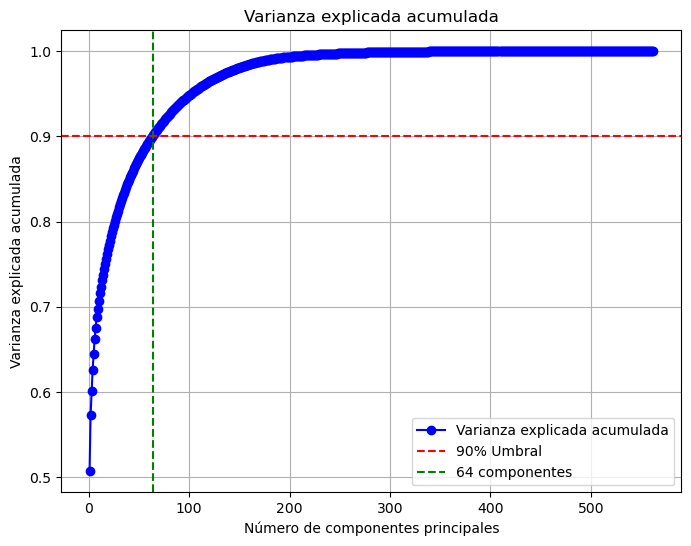

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Realizar PCA sobre el conjunto de datos escalados X_train_scaled
pca = PCA()
pca.fit(X_train_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Mostrar la varianza explicada por cada componente
print(f"Varianza explicada por cada componente: {explained_variance}")


# Obtener la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Número total de componentes
n_componentes = len(varianza_explicada_acumulada)

# Umbral de varianza explicada (90%)
umbral_varianza = 0.90

# Encontrar el número de componentes necesarios para alcanzar el umbral del 90%
componentes_90 = np.argmax(varianza_explicada_acumulada >= umbral_varianza) + 1

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_componentes + 1), varianza_explicada_acumulada, marker='o', linestyle='-', color='b', label='Varianza explicada acumulada')

# Añadir una línea horizontal al 90% de varianza explicada
plt.axhline(y=umbral_varianza, color='r', linestyle='--', label="90% Umbral")

# Añadir una línea vertical en el componente donde se alcanza el 90% de varianza
plt.axvline(x=componentes_90, color='g', linestyle='--', label=f"{componentes_90} componentes")

# Títulos y etiquetas
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


**Interpretación del gráfico**
* **Eje Y (Varianza explicada acumulada):** Muestra la cantidad total de información (o variabilidad) explicada por los primeros n componentes. Comienza en 0.5 (porque es el valor mínimo de variabilidad explicada) y llega hasta 1 (la varianza total de los datos).
* **Eje X (Número de componentes principales):** Muestra el número de componentes principales utilizados.
* **Línea azul:** Representa la varianza explicada acumulada de los componentes principales. Verás que la curva empieza a estabilizarse después de cierto número de componentes, lo que indica que agregar más componentes no aporta significativamente más información.
* **Línea roja (umbral del 90%):** Esta línea muestra el punto de corte del 90% de la varianza explicada acumulada. Este umbral te da una idea de cuántos componentes principales son necesarios para retener el 90% de la información original.
* **Línea verde (componente que alcanza el 90%):** La línea vertical indica el número de componentes necesarios para alcanzar el umbral del 90%. En el gráfico, la línea verde marca el componente principal donde la varianza acumulada alcanza el 90%.


**Umbral de 90%**
* El gráfico incluye una línea horizontal en el 90% de la varianza explicada acumulada. Este umbral es importante porque indica cuánta información de los datos es retenida al usar una cierta cantidad de componentes. En muchos casos, un umbral del 90% es adecuado, ya que se retiene una cantidad significativa de información sin tener que usar todos los componentes disponibles, lo que facilita la interpretación y el análisis de los datos.



**Interpretar los resultados**

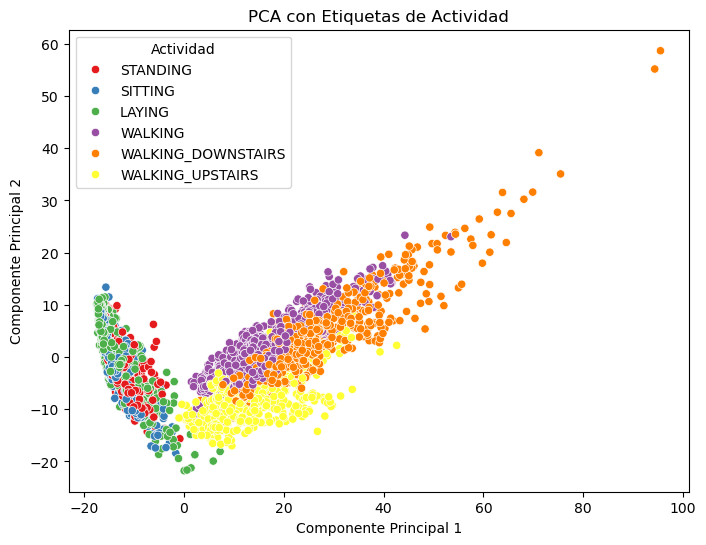

In [32]:
# Si tienes una columna 'Actividad' con las actividades reales, puedes visualizarlas por grupos
df_train['PCA_1'] = X_pca[:, 0]
df_train['PCA_2'] = X_pca[:, 1]

# Graficar con las actividades etiquetadas  
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Activity', data=df_train, palette='Set1')
plt.title('PCA con Etiquetas de Actividad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Actividad')
plt.show()


**Resumen de los pasos:**
* Seleccionamos las columnas de aceleración (X, Y, Z).
* Estandarizamos los datos para garantizar que PCA funcione correctamente.
* Aplicamos PCA para reducir la dimensionalidad a 2 componentes principales.
* Visualizamos los datos reducidos en un gráfico de dispersión.
* Comprobamos la varianza explicada por cada componente principal para evaluar la importancia de cada uno.
* Si tienes etiquetas de actividad, las visualizamos para observar cómo se distribuyen en el espacio reducido.

Este proceso te permitirá reducir la dimensionalidad de tus datos sensoriales y visualizarlos de una manera más comprensible, lo que facilita la identificación de patrones en las actividades de los usuarios.

### Análisis de los resultados:

**1. Agrupación de actividades:**  
Verás cómo los puntos se agrupan en función de las actividades. Las actividades similares (por ejemplo, caminar y correr) deberían estar cercanas en el espacio reducido, mientras que las actividades más diferentes (caminar frente a subir escaleras) estarán más separadas.

**2. Identificación de patrones visuales:**  
Podrás identificar patrones visuales que indiquen relaciones entre las características sensoriales de las actividades, como las lecturas de aceleración.

**3. Reducción a 2 componentes principales (PCA):**  
Usamos PCA para reducir las dimensiones a las dos primeras componentes principales, lo que permite visualizar los datos en un espacio de dos dimensiones.

**4. Visualización con un gráfico de dispersión:**  
Presentamos un gráfico de dispersión para mostrar cómo se distribuyen los puntos en el espacio reducido.

**5. Coloreado por actividad:**  
Si tienes etiquetas de actividad, usarlas para colorear los puntos en el gráfico ayudará a visualizar cómo se agrupan las actividades.


Ajustar PCA para 3 componentes principales

In [37]:
# Crear el objeto PCA y ajustar los datos para 3 componentes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_scaled)


Crear un gráfico 3D

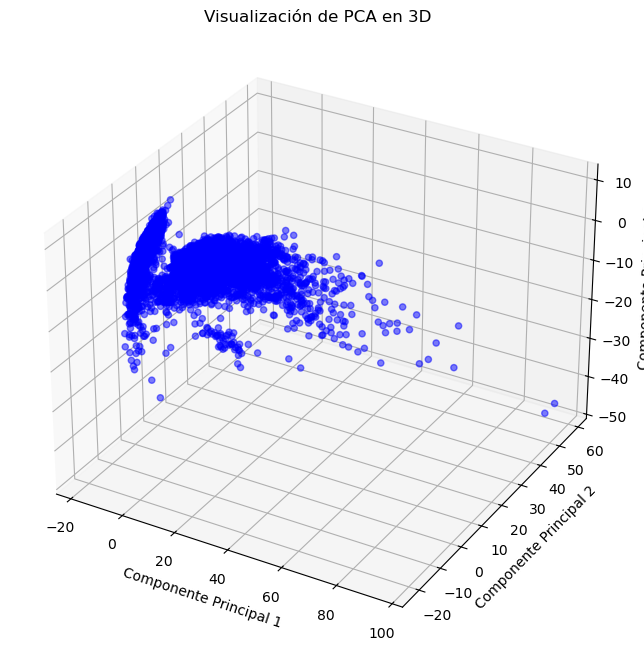

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura para el gráfico 3D
fig = plt.figure(figsize=(10, 8))

# Crear un objeto 3D
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos 3D usando las tres componentes principales
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='blue', alpha=0.5)

# Añadir etiquetas a los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Añadir título
ax.set_title('Visualización de PCA en 3D')

plt.show()


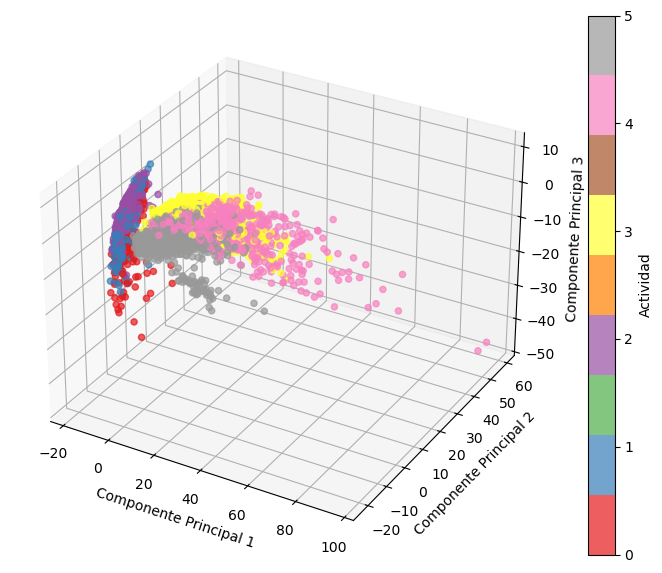

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Suponiendo que 'df_train' es tu DataFrame y 'Activity' es la columna de las categorías
encoder = LabelEncoder()
df_train['Activity_encoded'] = encoder.fit_transform(df_train['Activity'])

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos 3D con actividades codificadas numéricamente
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_train['Activity_encoded'], cmap='Set1', alpha=0.7)

# Añadir etiquetas a los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Añadir la barra de colores
fig.colorbar(scatter, ax=ax, label='Actividad')

plt.show()


**Varianza explicada por los componentes**
* La varianza explicada por cada componente principal indica la cantidad de variabilidad o información que ese componente captura del conjunto de datos. En otras palabras, nos dice cuánta "información" de los datos originales se retiene en cada componente. Un valor más alto de varianza explicada significa que ese componente es más relevante para describir los datos.

* El explained_variance_ratio_ de PCA da una proporción de la varianza explicada por cada componente en relación con la varianza total de los datos. Este valor está entre 0 y 1, y la suma de todas las proporciones de la varianza explicada será igual a 1.

**3. Varianza explicada acumulada**

* La varianza explicada acumulada se refiere a la suma de las varianzas explicadas por los primeros n componentes principales. Esta es la que se representa en el gráfico.

* Por ejemplo, si los dos primeros componentes explican el 80% de la varianza acumulada, esto significa que esos dos componentes juntos retienen el 80% de la información original de los datos. A medida que agregas más componentes, el porcentaje de varianza explicada acumulada aumenta.



In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = df_train.drop(columns=['Activity'])  # Suponiendo que la columna 'activity' es la etiqueta
y = df_train['Activity']

# Normalizar las características (aceleraciones, energías, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


Crear el modelo MLP:

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Definir el modelo
model = Sequential()

# Capa de entrada (igual al número de características de X)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Capas ocultas (al menos 2 capas)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Capa de salida (una unidad por cada clase de actividad)
# Si 'activity' es una columna categórica, utilizamos softmax en la capa de salida
model.add(Dense(y.nunique(), activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


AttributeError: module 'inspect' has no attribute 'ArgSpec'